# Linear Regression - Example: Formula 1 Data

## Overview
In this notebook, we will walk through a simple example of linear regression using a small Formula 1–inspired dataset. No prior knowledge of linear regression is assumed. We will:

- Introduce the concept  
- Load and inspect the data  
- Visualize relationships  
- Train a linear regression model  
- Evaluate and interpret the results

Let’s learn how to use linear regression with a real example:  
**Can we predict a driver’s race finishing position based on their qualifying lap time?**

## 1. What Is Linear Regression?

Linear regression is a statistical technique for modeling the relationship between a **predictor** (input) and a **response** (output) as a straight line:

predicted_y = β₀ + β₁x

- β₀ (intercept) shifts the line up/down.  
- β₁ (slope) controls how steep the line is.  

Our goal: given data points \((x_i, y_i)\), find the β₀ and β₁ that best “fit” those points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# adjust the path if needed
df = pd.read_csv('Data/best-selling video games of all time.csv')

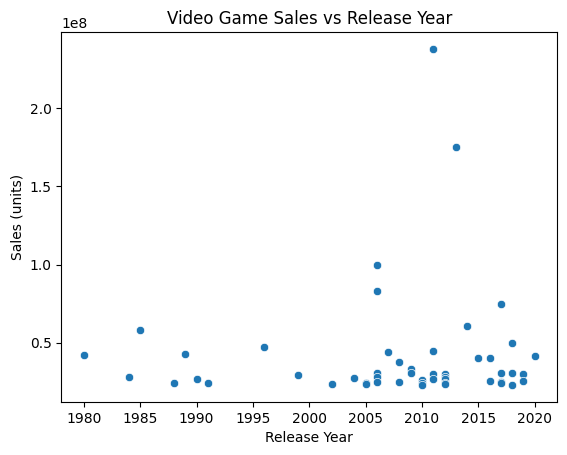

In [3]:
# convert release date to datetime and extract the year
df['ReleaseDate'] = pd.to_datetime(df['Initial release date'])
df['Year'] = df['ReleaseDate'].dt.year

# scatterplot: release year vs sales
sns.scatterplot(data=df, x='Year', y='Sales')
plt.title('Video Game Sales vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Sales (units)')
plt.show()

In [4]:
# feature: release year
X = df[['Year']]

# target: total sales
y = df['Sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Coefficient (slope): 131389.70
Intercept: -218558996.73


R² score: -9.26
Mean Squared Error: 284691975170176.12


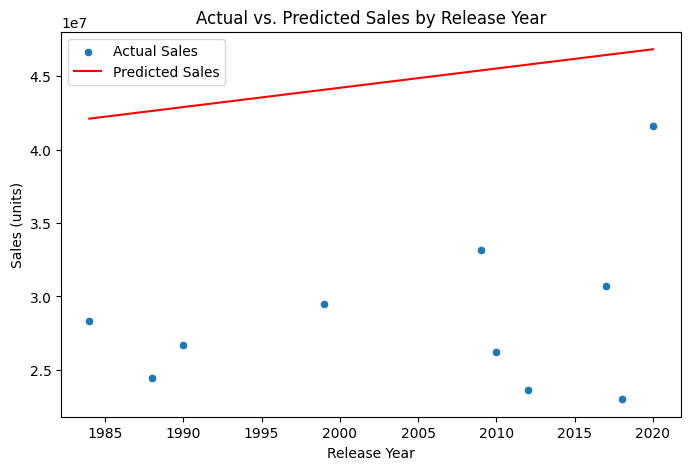

In [7]:
# make predictions on the test set
y_pred = model.predict(X_test)

# compute metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# plot actual vs. predicted with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Year'], y=y_test, label='Actual Sales')
sns.lineplot(x=X_test['Year'], y=y_pred, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Sales (units)')
plt.legend()
plt.show()